Bike Price Prediction using Linear Regresssion

In [71]:
import pandas as pd 
import numpy as np

In [72]:
df = pd.read_csv("C:/YBI - DATASETS/Dataset-main/Bike Prices.csv")

In [73]:
df

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0
...,...,...,...,...,...,...,...,...
1056,Royal,Royal Enfield Electra 5 S,90000,2012,Individual,1st owner,40000,NaN
1057,Hero,Hero Honda Hunk,20000,2010,Individual,1st owner,17000,NaN
1058,Bajaj,Bajaj Pulsar 220 DTS-i,60000,2014,Individual,1st owner,16000,NaN
1059,Hero,Hero Honda CBZ extreme,40000,2009,Individual,1st owner,50000,NaN


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [75]:
df=df.dropna()

In [76]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


In [77]:
df[['Brand']].value_counts()


Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [78]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [79]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [80]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

In [81]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [82]:
df.shape

(626, 8)

In [83]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [84]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)

In [85]:
#x=pd.get_dummies(x,columns=['Seller_Type','Owner'],drop_first=True)

In [86]:
y=df['Selling_Price']

In [87]:
y.shape

(626,)

In [88]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [89]:
x=df[['Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price']]

In [90]:
#x=df.drop(['Brand', 'Model', 'Selling_Price']axis=1)

In [91]:
x.shape

(626, 6)

In [92]:
x

,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,30000,2017,0,0,8000,30490.0
1,18000,2017,0,0,35000,32000.0
2,20000,2011,0,0,10000,37675.0
3,25000,2010,0,0,43000,42859.0
4,24999,2012,0,1,35000,42859.0
...,...,...,...,...,...,...
621,330000,2014,0,3,6500,534000.0
622,300000,2011,0,0,12000,589000.0
623,425000,2017,0,1,13600,599000.0
624,760000,2019,0,0,2800,752020.0


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.3,random_state=2529)

In [95]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((187, 6), (439, 6), (187,), (439,))

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
lr = LinearRegression()

In [146]:
lr.fit(x_train,y_train)

LinearRegression()

In [147]:
y_pred=lr.predict(x_test)

In [148]:
y_pred.shape

(439,)

In [149]:
y_pred

array([ 30000.,  45000.,  45000.,  45000.,  45000.,  50000.,  25000.,
        80000., 140000.,  50000.,  25000.,  30000.,  65000.,  45000.,
        75000., 100000.,  70000.,  35000.,  41000.,  40000.,  48000.,
        50000.,  35000.,  60000., 105000.,  30000.,  45000., 110000.,
        35000.,  30000.,  20000., 125000.,  38000.,  35000.,  60000.,
        25000.,  35000.,  50000.,  60000.,  15000.,  65000.,  25000.,
        48000.,  28000.,  85000.,  30900., 110000., 100000.,  80000.,
        30000.,  80000.,  65000.,  30000.,  55000.,  22000.,  55000.,
        35000.,  43000.,  55000.,  47000.,  23000.,  21000.,  56000.,
        30000., 115000.,  24000.,  40000.,  60000.,  50000.,  50000.,
        20000.,  50000., 300000.,  56000.,  48000.,  45000.,  30000.,
        80000.,  50000., 130000.,  27000.,  25000.,  30000., 135000.,
        35000.,  18000.,  18000.,  78500., 760000., 150000.,  90000.,
        52000.,  35000.,  18000.,  25000.,  25000.,  22000.,  32000.,
        20000.,  300

In [150]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [151]:
mean_absolute_percentage_error(y_test, y_pred)

1.9376742735496567e-16

In [152]:
r2_score(y_test, y_pred)

1.0

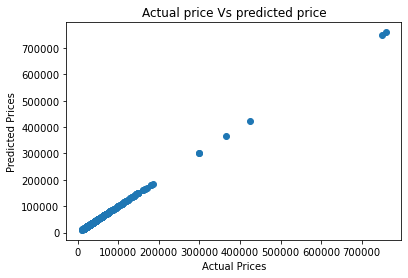

In [153]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price Vs predicted price")
plt.show()

In [154]:
df_new = df.sample(1)

In [155]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
43,Hero,Hero Pleasure,20000,2012,0,1,30000,49600.0


In [156]:
df_new.shape

(1, 8)

In [160]:
x_new = df_new.drop(['Brand', 'Model', 'Selling_Price'],axis = 1)

In [ ]:
y_pred_new = lr.predict(x_new)